In [1]:
import pandas as pd
import numpy as np

In [2]:
# データの読み込み
df_ori = pd.read_csv('../umdaa02-touch/TrainEventDictionary_70.csv')
# print(df_ori.head())

In [4]:
df_ori.head()

,index1,index2,eventTime,USER,SESSION,eventPressure,eventType,positionX,positionY,tag
0,0,0,112632,Ph01USER001,17_21_02_574-SESSION,0.6375,532,981,976,O
1,0,1,112640,Ph01USER001,17_21_02_574-SESSION,0.6375,533,980,976,O
2,0,2,112648,Ph01USER001,17_21_02_574-SESSION,0.6500,533,976,976,O
3,0,3,112657,Ph01USER001,17_21_02_574-SESSION,0.6500,533,970,976,O
4,0,4,112665,Ph01USER001,17_21_02_574-SESSION,0.6500,533,960,976,O


# データの確認

In [18]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754715 entries, 0 to 2754714
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   index1         int64  
 1   index2         int64  
 2   eventTime      int64  
 3   USER           object 
 4   SESSION        object 
 5   eventPressure  float64
 6   eventType      int64  
 7   positionX      int64  
 8   positionY      int64  
 9   tag            object 
dtypes: float64(1), int64(6), object(3)
memory usage: 210.2+ MB


In [19]:
# それぞれ確認

In [13]:
# dataframeの行数・列数の確認
df_ori.shape

(2754715, 10)

In [14]:
# indexの確認
df_ori.index

RangeIndex(start=0, stop=2754715, step=1)

In [15]:
# Columnの確認
df_ori.columns

Index(['index1', 'index2', 'eventTime', 'USER', 'SESSION', 'eventPressure',
       'eventType', 'positionX', 'positionY', 'tag'],
      dtype='object')

各Columnの説明もどき

index1→SESSION内でのタッチデータの順番を表していると思われる

index2→各SESSON内のindexごとのデータの長さを表している感じがする 

eventTime→時間

USER→ユーザ

SESSION→セッション

eventPressure→圧力

eventType→532がtouch down, ５３３がmove finger on screen

positionX→位置ｘ

positionY→位置ｙ

tag →要らんというか全部０なので意味がない

dtype: object

In [16]:
# dataframeの各列のデータ型を確認
df_ori.dtypes

index1             int64
index2             int64
eventTime          int64
USER              object
SESSION           object
eventPressure    float64
eventType          int64
positionX          int64
positionY          int64
tag               object
dtype: object

## >> objectを数値に直す

In [17]:
# 統計量をみるがここでは意味がないのでノーコメント
df_ori.describe()

,index1,index2,eventTime,eventPressure,eventType,positionX,positionY
count,2.754715e+06,2.754715e+06,2.754715e+06,2.754715e+06,2.754715e+06,2.754715e+06,2.754715e+06
mean,1.327256e+02,3.906361e+01,3.603185e+07,5.855260e-01,5.329128e+02,6.437325e+02,1.102717e+03
std,2.569518e+02,1.771947e+02,3.940249e+07,8.767863e-02,2.820817e-01,3.510238e+02,3.816162e+02
min,0.000000e+00,0.000000e+00,2.425700e+04,7.500000e-02,5.320000e+02,0.000000e+00,0.000000e+00
25%,1.500000e+01,3.000000e+00,8.902040e+06,5.625000e-01,5.330000e+02,3.610000e+02,8.690000e+02
50%,4.900000e+01,9.000000e+00,2.241398e+07,5.875000e-01,5.330000e+02,6.990000e+02,1.168000e+03
75%,1.380000e+02,2.900000e+01,4.656506e+07,6.250000e-01,5.330000e+02,8.520000e+02,1.374000e+03
max,3.171000e+03,5.174000e+03,2.548185e+08,1.412500e+00,5.330000e+02,1.919000e+03,1.919000e+03


# 欠損値確認

In [5]:
#欠損値の確認　ある場合はTrueで返される
df_ori.isnull().head()

,index1,index2,eventTime,USER,SESSION,eventPressure,eventType,positionX,positionY,tag
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [6]:
# Falseの数え上げ
df_ori.isnull().count()

index1           2754715
index2           2754715
eventTime        2754715
USER             2754715
SESSION          2754715
eventPressure    2754715
eventType        2754715
positionX        2754715
positionY        2754715
tag              2754715
dtype: int64

In [7]:
df_ori.isnull().count().sum()

27547150

In [8]:
# 欠損値のカウント
df_ori.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int)

,index1,index2,eventTime,USER,SESSION,eventPressure,eventType,positionX,positionY,tag
False,2754715,2754715,2754715,2754715,2754715,2754715,2754715,2754715,2754715,2754715


In [9]:
df_ori.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int).T

,False
index1,2754715
index2,2754715
eventTime,2754715
USER,2754715
SESSION,2754715
eventPressure,2754715
eventType,2754715
positionX,2754715
positionY,2754715
tag,2754715


In [10]:
# 欠損率
df_ori.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)

,index1,index2,eventTime,USER,SESSION,eventPressure,eventType,positionX,positionY,tag
False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
# 全てのColumnに対して欠損値の合計を出す
len(df_ori) - df_ori.count()

index1           0
index2           0
eventTime        0
USER             0
SESSION          0
eventPressure    0
eventType        0
positionX        0
positionY        0
tag              0
dtype: int64

In [ ]:
# 結果からしてorignalデータは欠損がないのは分かった

# とりあえずプロットしてみる

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df_ori.head()

,index1,index2,eventTime,USER,SESSION,eventPressure,eventType,positionX,positionY,tag
0,0,0,112632,Ph01USER001,17_21_02_574-SESSION,0.6375,532,981,976,O
1,0,1,112640,Ph01USER001,17_21_02_574-SESSION,0.6375,533,980,976,O
2,0,2,112648,Ph01USER001,17_21_02_574-SESSION,0.6500,533,976,976,O
3,0,3,112657,Ph01USER001,17_21_02_574-SESSION,0.6500,533,970,976,O
4,0,4,112665,Ph01USER001,17_21_02_574-SESSION,0.6500,533,960,976,O


In [22]:
# ユーザの値が扱いにくいのでここで別件で作成したデータを引っ張ってくる

In [23]:
df_ori2 = pd.read_csv('../orignal_data/data_user_session_change.csv')

In [24]:
df_ori2.head()

,index1,index2,eventTime,USER,SESSION,eventPressure,eventType,positionX,positionY,tag
0,0,0,112632,0,4406,0.6375,532,981,976,O
1,0,1,112640,0,4406,0.6375,533,980,976,O
2,0,2,112648,0,4406,0.6500,533,976,976,O
3,0,3,112657,0,4406,0.6500,533,970,976,O
4,0,4,112665,0,4406,0.6500,533,960,976,O


USER情報

Ph01USER001 → 0
Ph01USER002 → 1
Ph01USER003 → 2
Ph01USER004 → 3
Ph02USER001 → 4
Ph02USER002 → 5
Ph02USER003 → 6
Ph02USER004 → 7
Ph02USER005 → 8
Ph03USER001 → 9
Ph03USER002 → 10
Ph03USER003 → 11
Ph04USER001 → 12
Ph04USER002 → 13
Ph04USER003 → 14
Ph04USER004 → 15
Ph05USER001 → 16
Ph05USER002 → 17
Ph05USER003 → 18
Ph05USER004 → 19
Ph06USER001 → 20
Ph06USER002 → 21
Ph06USER003 → 22
Ph06USER005 → 23
Ph08USER001 → 24
Ph08USER002 → 25
Ph08USER003 → 26
Ph09USER001 → 27
Ph09USER002 → 28
Ph09USER003 → 29
Ph09USER004 → 30
Ph10USER001 → 31
Ph10USER002 → 32
Ph10USER003 → 33
Ph10USER004 → 34
Takeout → 35

In [28]:
df_ori2.iloc[:, 6]

0          532
1          533
2          533
3          533
4          533
          ... 
2754710    533
2754711    533
2754712    533
2754713    533
2754714    533
Name: eventType, Length: 2754715, dtype: int64

In [39]:
# touch_upのリストを作成していく

In [42]:
# ２〜３分くらいで完了
tu = []
for i in range(len(df_ori2)-1):
    if df_ori2.iloc[i, 6] == 533 and df_ori2.iloc[i+1, 6] == 532:
        tu.append(i)

In [66]:
# 一番最後を追加
tu.append(2754714)

In [68]:
# リストの保存

In [69]:
def write_tu(tu):
    touch_down_list_train = pd.DataFrame(tu)
    touch_down_list_train.to_csv('touch_down_list_train.csv', mode='w')

In [70]:
# write_tu(tu)

In [86]:
tu

[14,
 27,
 37,
 48,
 51,
 55,
 57,
 61,
 64,
 67,
 69,
 74,
 76,
 82,
 90,
 145,
 251,
 259,
 264,
 270,
 282,
 293,
 304,
 307,
 314,
 318,
 326,
 334,
 338,
 346,
 351,
 359,
 365,
 372,
 375,
 382,
 389,
 392,
 394,
 396,
 404,
 411,
 418,
 421,
 430,
 432,
 435,
 437,
 439,
 441,
 445,
 449,
 468,
 476,
 479,
 482,
 485,
 487,
 490,
 493,
 495,
 549,
 551,
 554,
 556,
 560,
 562,
 565,
 568,
 570,
 572,
 574,
 579,
 582,
 594,
 605,
 613,
 621,
 631,
 636,
 640,
 659,
 677,
 696,
 699,
 721,
 791,
 793,
 795,
 798,
 800,
 803,
 808,
 841,
 866,
 885,
 892,
 935,
 985,
 1023,
 1037,
 1060,
 1065,
 1206,
 1238,
 1262,
 1270,
 1389,
 1413,
 1439,
 1444,
 1515,
 1584,
 1611,
 1616,
 1620,
 1622,
 1939,
 1970,
 2087,
 2134,
 2151,
 2274,
 2302,
 2323,
 2345,
 2365,
 2380,
 2384,
 2386,
 2389,
 2393,
 2396,
 2401,
 2406,
 2408,
 2411,
 2413,
 2416,
 2418,
 2420,
 2422,
 2424,
 2426,
 2428,
 2431,
 2438,
 2445,
 2469,
 2472,
 2481,
 2486,
 2491,
 2509,
 2512,
 2515,
 2546,
 2564,
 2585,
 

In [71]:
# 確認
df_ori2.head(16)
# indexの１４がstrokeの最後で一致している

,index1,index2,eventTime,USER,SESSION,eventPressure,eventType,positionX,positionY,tag
0,0,0,112632,0,4406,0.6375,532,981,976,O
1,0,1,112640,0,4406,0.6375,533,980,976,O
2,0,2,112648,0,4406,0.6500,533,976,976,O
3,0,3,112657,0,4406,0.6500,533,970,976,O
4,0,4,112665,0,4406,0.6500,533,960,976,O
5,0,5,112673,0,4406,0.6625,533,944,976,O
6,0,6,112681,0,4406,0.6625,533,922,977,O
7,0,7,112690,0,4406,0.6875,533,893,977,O
8,0,8,112698,0,4406,0.6875,533,857,978,O
9,0,9,112706,0,4406,0.6875,533,807,981,O


In [84]:
def plot_stroke(user_num, df, i,tu):
    '''
    user_num: user number
    df:dataframe
    touch_num: you can select number that is touch stroke.
    '''
    df2 = df[(df['USER'] == user_num)]
    
    # td = touch down, tu = touch up
    td = list(df2.query('eventType == 532').index)
    
    # plot_size
    fig = plt.figure(figsize=(9,16))
    ax1 = fig.add_subplot(1,1,1)
    
    one_stroke_x = df.iloc[td[i]:td[i+1],7]
    one_stroke_y = df.iloc[td[i]:td[i+1],8]
    two_stroke_x = df.iloc[td[i+1]:td[i+2],7]
    two_stroke_y = df.iloc[td[i+1]:td[i+2],8]
    
    one_start_x = df.iloc[td[i],7]
    one_start_y = df.iloc[td[i],8]
    two_start_x  = df.iloc[td[i+1],7]
    two_start_y = df.iloc[td[i+1],8]

    one_stop_x = df.iloc[tu[i],7]
    one_stop_y = df.iloc[tu[i],8]
    two_stop_x = df.iloc[tu[i+1],7]
    two_stop_y = df.iloc[tu[i+1],8]
    
    # plot
    ax1.plot(one_stroke_x,one_stroke_y,color='green', label = 'one')
    ax1.plot(two_stroke_x,two_stroke_y,color='blue', label = 'two')
    ax1.plot(one_start_x,one_start_y,color='red',marker="*", label = 'start')
    ax1.plot(two_start_x,two_start_y,color='red',marker="*")
    ax1.plot(one_stop_x,one_stop_y,color='orange',marker="8", label = 'stop')
    ax1.plot(two_stop_x,two_stop_y,color='orange',marker="8")
    
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=18)
    # 画面のメモリの設定
    ｐｌｔ.xticks([0,100,200,300,400,500, 600, 700, 800, 900, 1000, 1100, 1200],size=10)
    plt.yticks([0,100,200,300,400,500,600,700,800, 900, 1000, 1100, 1200, 1300, 1400, 1500],size=10)
    
    plt.show()
    

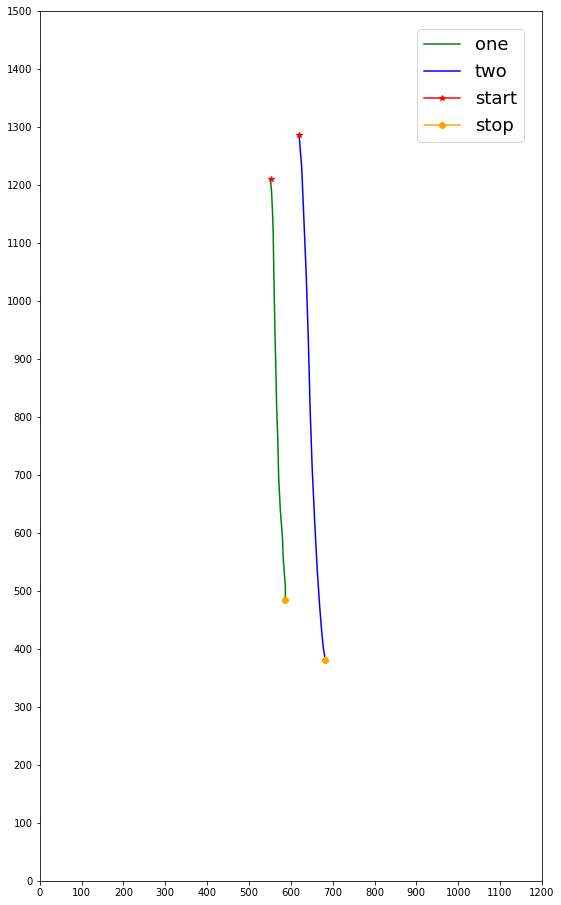

In [85]:
user_num = 0
touch_num = 600
plot_stroke(user_num, df_ori2, touch_num, tu)